# 0. Import of libraries

In [40]:
## IMPORT OF LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from scipy import stats
from datetime import datetime
from sklearn.cluster import KMeans

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

# 1. Load of dataset

In [41]:
df = pd.read_csv("credit_scoring.csv")
print(df.head())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

Below is the description of all the features in the data:

1. Age: This feature represents the age of the individual.
2. Gender: This feature captures the gender of the individual.
3. Marital Status: This feature denotes the marital status of the individual.
4. Education Level: This feature represents the highest level of education attained by the individual.
5. Employment Status: This feature indicates the current employment status of the individual.
6. Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
7. Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.
8. Number of Credit Accounts: It represents the count of active credit accounts the person holds.
9. Loan Amount: It indicates the monetary value of the loan. 
10. Interest Rate: This feature represents the interest rate associated with the  loan. 
11. Loan Term: This feature denotes the duration or term of the loan. 
12. Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

# 2. Data understanding

## 2.1 Dataset size

In [42]:

df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


## 2.2 Attribute types

In [43]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## 2.2 Data description and basics stadistics

In [44]:
df.columns


Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

In [45]:
df.head().T

,0,1,2,3,4
Age,60,25,30,58,32
Gender,Male,Male,Female,Female,Male
Marital Status,Married,Married,Single,Married,Married
Education Level,Master,High School,Master,PhD,Bachelor
Employment Status,Employed,Unemployed,Employed,Unemployed,Self-Employed
Credit Utilization Ratio,0.22,0.2,0.22,0.12,0.99
Payment History,2685.0,2371.0,2771.0,1371.0,828.0
Number of Credit Accounts,2,9,6,2,2
Loan Amount,4675000,3619000,957000,4731000,3289000
Interest Rate,2.65,5.19,2.76,6.57,6.28


In [46]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Gender,1000,2,Male,501
Marital Status,1000,3,Married,350
Education Level,1000,4,Master,262
Employment Status,1000,3,Self-Employed,347
Type of Loan,1000,3,Auto Loan,348


In [47]:
df.describe (include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,4.270200e+01,1.326677e+01,20.00,3.100000e+01,42.000,54.00,65.00
Credit Utilization Ratio,1000.0,5.099500e-01,2.910567e-01,0.00,2.500000e-01,0.530,0.75,1.00
Payment History,1000.0,1.452814e+03,8.279341e+02,0.00,7.637500e+02,1428.000,2142.00,2857.00
Number of Credit Accounts,1000.0,5.580000e+00,2.933634e+00,1.00,3.000000e+00,6.000,8.00,10.00
Loan Amount,1000.0,2.471401e+06,1.387047e+06,108000.00,1.298000e+06,2437500.000,3653250.00,4996000.00
Interest Rate,1000.0,1.068660e+01,5.479058e+00,1.01,6.022500e+00,10.705,15.44,19.99
Loan Term,1000.0,3.712800e+01,1.743627e+01,12.00,2.400000e+01,36.000,48.00,60.00


In [48]:
df.nunique().T

Age                           46
Gender                         2
Marital Status                 3
Education Level                4
Employment Status              3
Credit Utilization Ratio     101
Payment History              101
Number of Credit Accounts     10
Loan Amount                  897
Interest Rate                774
Loan Term                      5
Type of Loan                   3
dtype: int64

## 2.3 Nulls distribution

In [49]:


# There are no nulls in the dataset

df.isnull().sum()


Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

## 2.4. Data visualization

### 2.4.1 Credit utilization box plot


In [50]:

credit_utilization_fig = px.box(df, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.show()

### 2.4.2 Loan amount histogram


In [51]:
loan_amount_fig = px.histogram(df, x='Loan Amount', 
                               nbins=20, 
                               title='Loan Amount Distribution')
loan_amount_fig.show()

### 2.4.3 Data correlation Heatmap


In [52]:
### 4.3 Data correlation Heatmap

numeric_df = df[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]

correlation_fig = px.imshow(numeric_df.corr(), 
                            title='Correlation Heatmap')

In [53]:
correlation_fig.show()

### 2.4.4 Data distribution on histogram

In [54]:
numerical_columns = df.select_dtypes(include=np.number)

In [55]:
numerical_columns

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
0,60,0.22,2685.0,2,4675000,2.65,48
1,25,0.20,2371.0,9,3619000,5.19,60
2,30,0.22,2771.0,6,957000,2.76,12
3,58,0.12,1371.0,2,4731000,6.57,60
4,32,0.99,828.0,2,3289000,6.28,36
...,...,...,...,...,...,...,...
995,59,0.74,1285.0,8,3530000,12.99,48
996,64,0.77,1857.0,2,1377000,18.02,60
997,63,0.18,2628.0,10,2443000,18.95,12
998,51,0.32,1142.0,3,1301000,1.80,24


In [56]:
categorical_columns = df.select_dtypes(exclude=np.number)

In [57]:
categorical_columns

,Gender,Marital Status,Education Level,Employment Status,Type of Loan
0,Male,Married,Master,Employed,Personal Loan
1,Male,Married,High School,Unemployed,Auto Loan
2,Female,Single,Master,Employed,Auto Loan
3,Female,Married,PhD,Unemployed,Auto Loan
4,Male,Married,Bachelor,Self-Employed,Personal Loan
...,...,...,...,...,...
995,Male,Divorced,High School,Employed,Auto Loan
996,Male,Divorced,Bachelor,Unemployed,Home Loan
997,Female,Single,Master,Self-Employed,Personal Loan
998,Female,Married,PhD,Self-Employed,Auto Loan


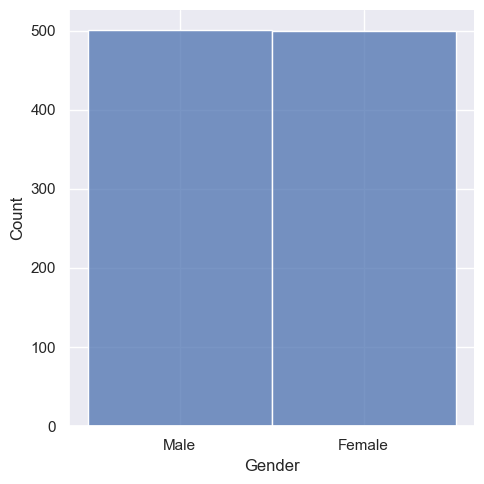

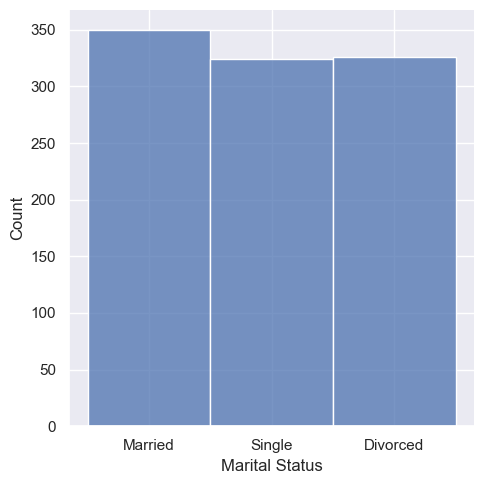

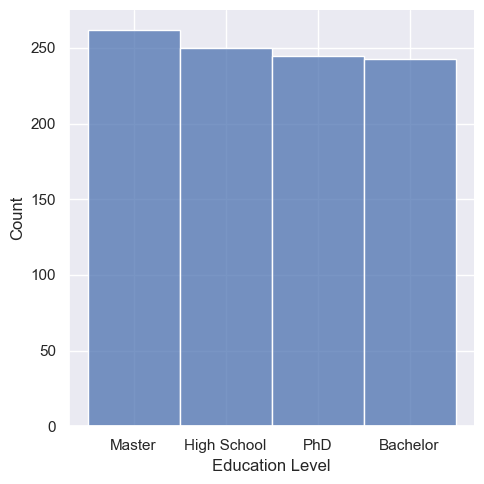

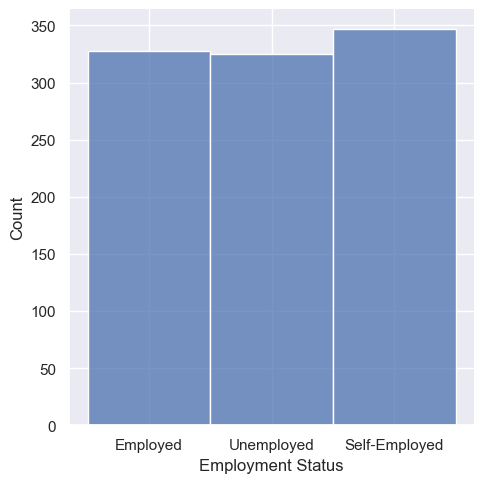

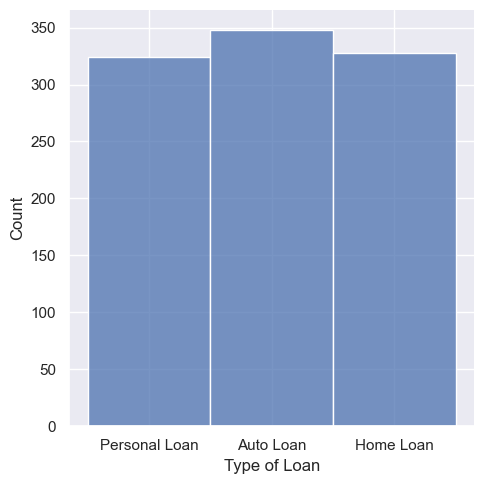

In [58]:
### 4.4 Histogram representation of categorical categories
for columns in categorical_columns:
    sns.displot (df, x=columns,)

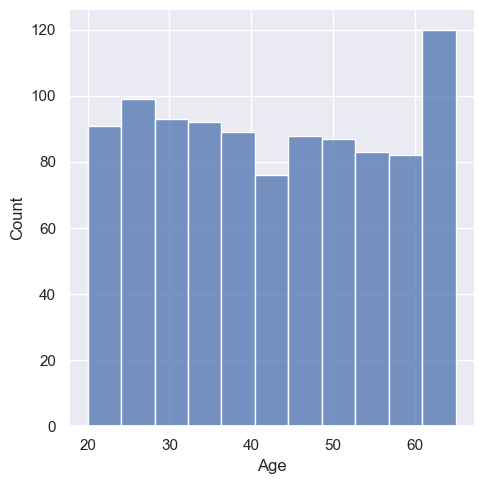

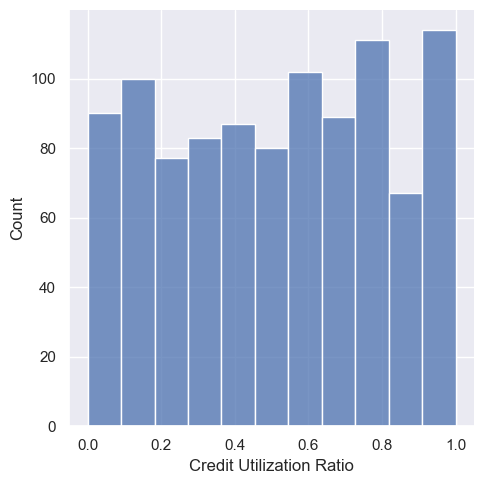

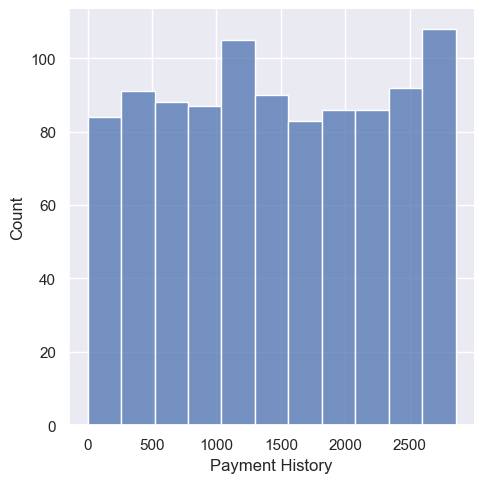

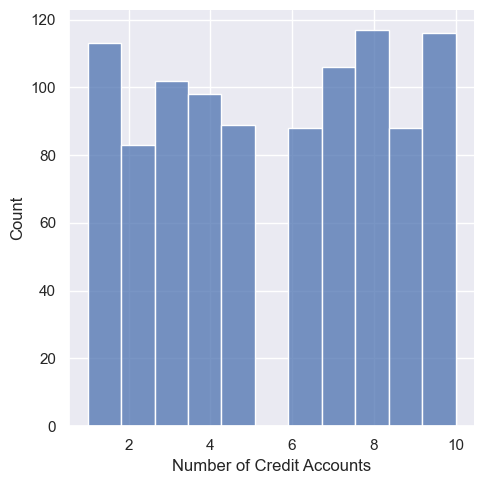

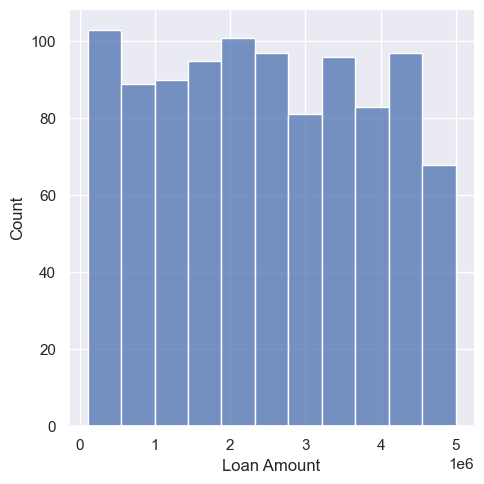

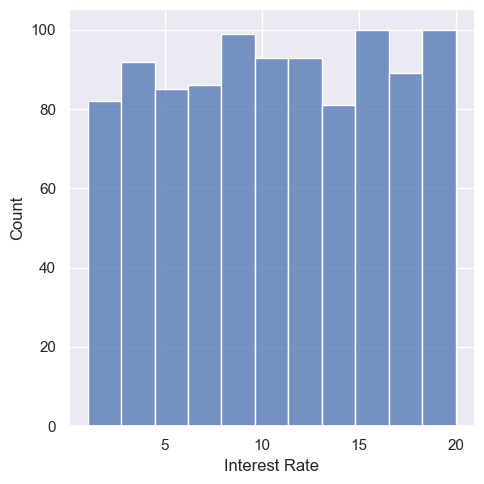

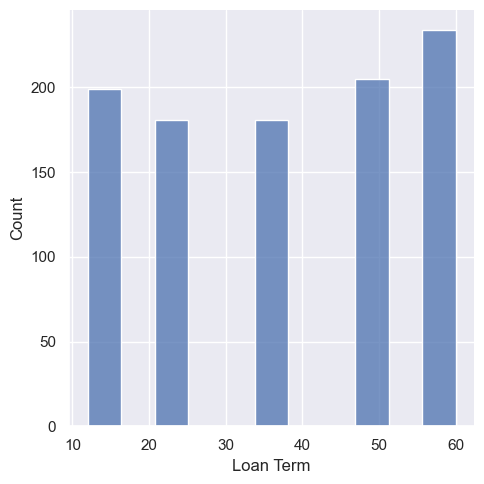

In [59]:
### 4.4 Histogram representation of numerical categories

for columns in numerical_columns:
    sns.displot (df, x=columns,)


In [60]:
categorical_columns

,Gender,Marital Status,Education Level,Employment Status,Type of Loan
0,Male,Married,Master,Employed,Personal Loan
1,Male,Married,High School,Unemployed,Auto Loan
2,Female,Single,Master,Employed,Auto Loan
3,Female,Married,PhD,Unemployed,Auto Loan
4,Male,Married,Bachelor,Self-Employed,Personal Loan
...,...,...,...,...,...
995,Male,Divorced,High School,Employed,Auto Loan
996,Male,Divorced,Bachelor,Unemployed,Home Loan
997,Female,Single,Master,Self-Employed,Personal Loan
998,Female,Married,PhD,Self-Employed,Auto Loan


In [61]:
numerical_columns.head()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
0,60,0.22,2685.0,2,4675000,2.65,48
1,25,0.20,2371.0,9,3619000,5.19,60
2,30,0.22,2771.0,6,957000,2.76,12
3,58,0.12,1371.0,2,4731000,6.57,60
4,32,0.99,828.0,2,3289000,6.28,36


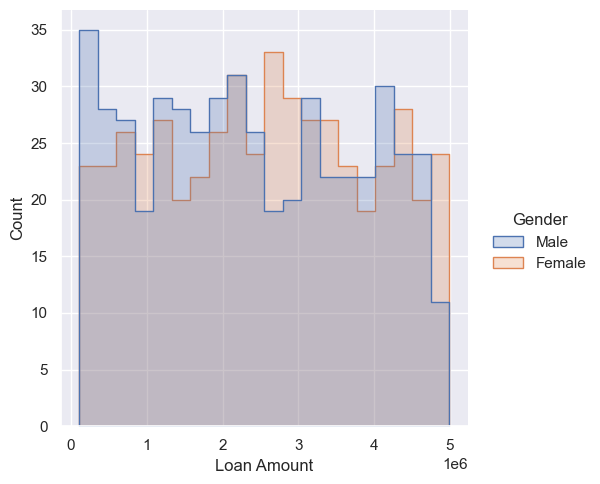

In [62]:
sns.displot(df, x="Loan Amount", hue="Gender", element="step", bins=20)

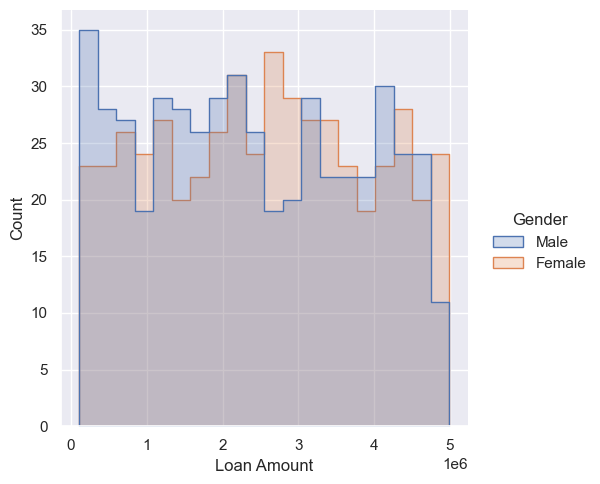

In [63]:
sns.displot(df, x="Loan Amount", hue="Gender", element="step", bins=20)

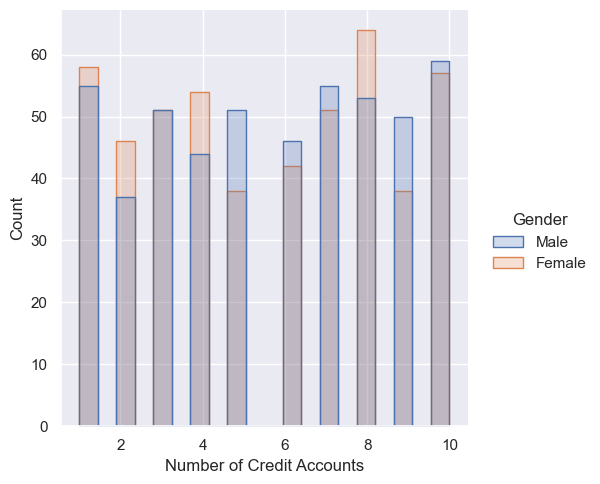

In [64]:
sns.displot(df, x="Number of Credit Accounts", hue="Gender", element="step", bins=20)

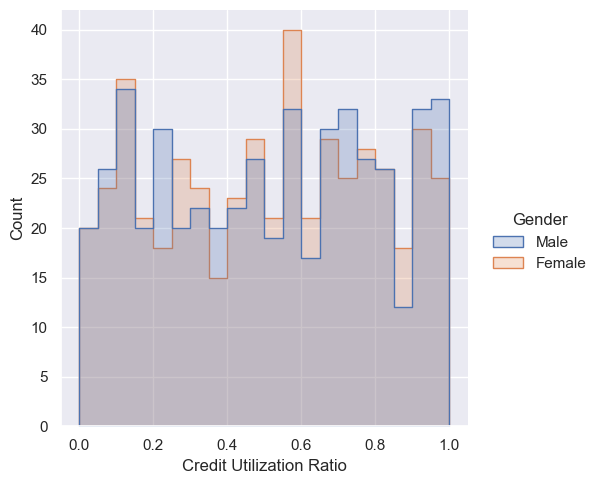

In [65]:
sns.displot(df, x="Credit Utilization Ratio", hue="Gender", element="step", bins=20)

# 3. Calculating Credit Scores

## 3.1 implementation of the FICO method to calculate credit scores:

In [66]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

In [67]:
# Apply mapping to categorical features
df['Education Level'] = df['Education Level'].map(education_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)

In [68]:
# Calculate credit scores using the complete FICO formula
credit_scores = []

Within the iteration, the FICO formula is applied to calculate the credit score for each individual. The formula incorporates the weighted values of the features mentioned earlier: 

35% weight for “Payment History”, 
30% weight for “Credit Utilization Ratio”, 
15% weight for “Number of Credit Accounts”, 
10% weight for “Education Level”, 
and 10% weight for “Employment Status”

In [69]:
for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

In [70]:
# Add the credit scores as a new column to the DataFrame
df['Credit Score'] = credit_scores

In [71]:
print(df.head())

   Age  Gender Marital Status  Education Level  Employment Status  \
0   60    Male        Married                3                  1   
1   25    Male        Married                1                  0   
2   30  Female         Single                3                  1   
3   58  Female        Married                4                  0   
4   32    Male        Married                2                  2   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  Credit Score  
0      4675000           2.65         48  Personal Loan       

# 4. Segmentation Based on Credit Scores

In [73]:
x = df[['Credit Score']]
kmeans = KMeans (n_clusters = 4, n_init =10, random_state = 42)
kmeans.fit (x)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [74]:
df['Segment'] = kmeans.labels_

In [76]:
# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype ('category')

In [79]:
# VIsualize the segment using Plotly

fig = px.scatter (df, x=df.index, y= 'Credit Score', color = 'Segment',
                  color_discrete_sequence=['green', 'blue', 'yellow', 'red'])

fig.update_layout(
xaxis_title = 'Customer Index',
yaxis_title = 'Credit Score',
title = 'Customer Segmentation based on Credit Scores'
)

c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [81]:
df['Segment'] = df['Segment'].map({2: 'Very Low', 
                                       0: 'Low',
                                       1: 'Good',
                                       3: "Excellent"})

In [84]:
# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')

In [86]:
# Visualize the segments using Plotly
fig = px.scatter(df, x=df.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

